# Exploratory Data Analysis

A notebook to plot different distributions of statistics for each votes, to see if there are any factors that show a distinct seperation in the distributions.

Also explore potential dummy variables where some combination of statistics tend to poll more often that not.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_parquet('../data/raw/cleaned_stats_12-22_fixed_bv.parquet')

In [6]:
df.columns

Index(['match_id', 'match_home_team', 'match_away_team', 'match_date',
       'match_round', 'match_home_team_goals', 'match_home_team_behinds',
       'match_home_team_score', 'match_away_team_goals',
       'match_away_team_behinds', 'match_away_team_score', 'match_margin',
       'match_winner', 'player_id', 'player_first_name', 'player_last_name',
       'player_team', 'kicks', 'marks', 'handballs', 'disposals',
       'effective_disposals', 'disposal_efficiency_percentage', 'goals',
       'behinds', 'hitouts', 'tackles', 'rebounds', 'inside_fifties',
       'clearances', 'clangers', 'free_kicks_for', 'free_kicks_against',
       'brownlow_votes', 'contested_possessions', 'uncontested_possessions',
       'contested_marks', 'marks_inside_fifty', 'one_percenters', 'bounces',
       'goal_assists', 'time_on_ground_percentage', 'afl_fantasy_score',
       'centre_clearances', 'stoppage_clearances', 'score_involvements',
       'metres_gained', 'turnovers', 'intercepts', 'tackles_insi

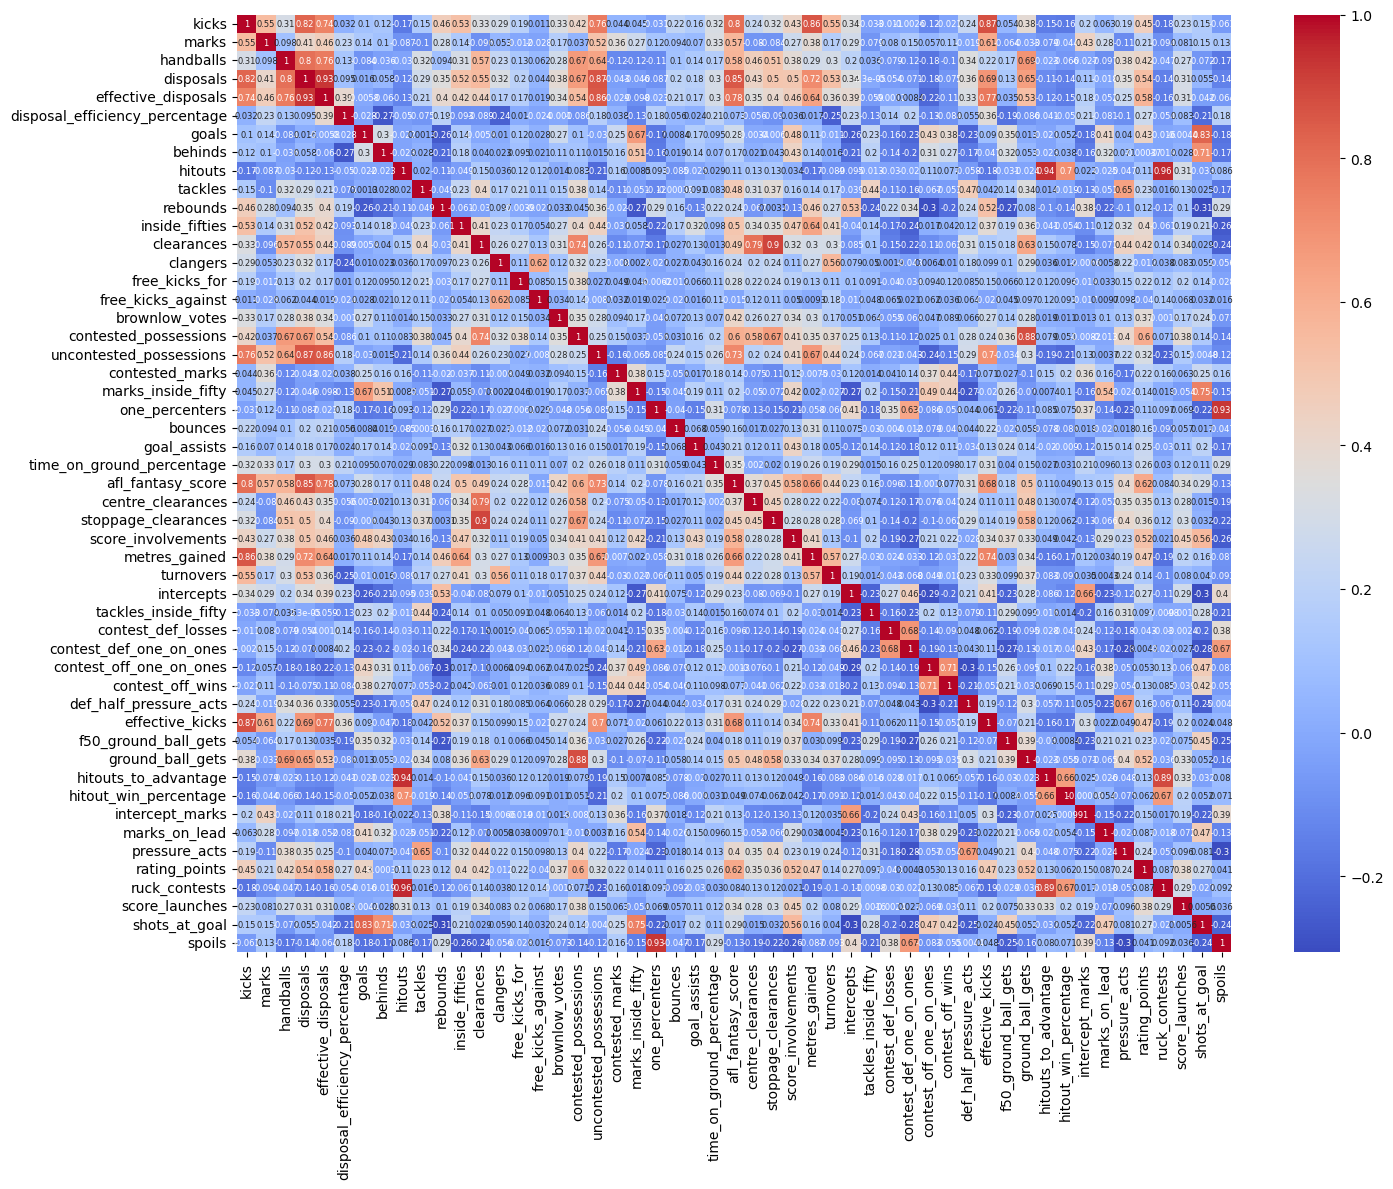

In [7]:
correlation_matrix = df[['kicks', 'marks', 'handballs', 'disposals',
       'effective_disposals', 'disposal_efficiency_percentage', 'goals',
       'behinds', 'hitouts', 'tackles', 'rebounds', 'inside_fifties',
       'clearances', 'clangers', 'free_kicks_for', 'free_kicks_against',
       'brownlow_votes', 'contested_possessions', 'uncontested_possessions',
       'contested_marks', 'marks_inside_fifty', 'one_percenters', 'bounces',
       'goal_assists', 'time_on_ground_percentage', 'afl_fantasy_score',
       'centre_clearances', 'stoppage_clearances', 'score_involvements',
       'metres_gained', 'turnovers', 'intercepts', 'tackles_inside_fifty',
       'contest_def_losses', 'contest_def_one_on_ones',
       'contest_off_one_on_ones', 'contest_off_wins', 'def_half_pressure_acts',
       'effective_kicks', 'f50_ground_ball_gets', 'ground_ball_gets',
       'hitouts_to_advantage', 'hitout_win_percentage', 'intercept_marks',
       'marks_on_lead', 'pressure_acts', 'rating_points', 'ruck_contests',
       'score_launches', 'shots_at_goal', 'spoils']].corr()

plt.subplots(figsize=(15, 12))
sns.heatmap(correlation_matrix, cmap='coolwarm',
            annot=True, annot_kws={"size": 6})
plt.tight_layout()
plt.show()

In [8]:
df.query('player_position == "SUB" & time_on_ground_percentage < 50')

,match_id,match_home_team,match_away_team,match_date,match_round,match_home_team_goals,match_home_team_behinds,match_home_team_score,match_away_team_goals,match_away_team_behinds,...,intercept_marks,marks_on_lead,pressure_acts,rating_points,ruck_contests,score_launches,shots_at_goal,spoils,player_position,season
41,13960,Greater Western Sydney,Sydney,2012-03-24,1,5,7,37,14,16,...,0.0,0.0,4.0,2.6,0.0,0.0,0.0,0.0,SUB,2012
43,13960,Greater Western Sydney,Sydney,2012-03-24,1,5,7,37,14,16,...,0.0,0.0,5.0,1.6,0.0,1.0,0.0,0.0,SUB,2012
81,13961,Richmond,Carlton,2012-03-29,1,12,9,81,18,17,...,0.0,0.0,4.0,9.8,0.0,0.0,2.0,0.0,SUB,2012
84,13961,Richmond,Carlton,2012-03-29,1,12,9,81,18,17,...,0.0,0.0,9.0,4.7,0.0,0.0,0.0,0.0,SUB,2012
119,13962,Hawthorn,Collingwood,2012-03-30,1,20,17,137,16,19,...,0.0,0.0,2.0,8.1,0.0,1.0,2.0,0.0,SUB,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9012,16344,Hawthorn,Western Bulldogs,2022-08-21,23,10,4,64,12,15,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,SUB,2022
9020,16345,Carlton,Collingwood,2022-08-21,23,10,14,74,11,9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,SUB,2022
9054,16345,Carlton,Collingwood,2022-08-21,23,10,14,74,11,9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,SUB,2022
9071,16346,St Kilda,Sydney,2022-08-21,23,11,8,74,13,10,...,0.0,1.0,13.0,7.4,0.0,0.0,0.0,1.0,SUB,2022


In [9]:
columns = [
    'player_first_name',
    'player_last_name',
    'player_team',
    'season',
    'match_round',
    'match_winner',
    'goals',
    'disposals',
    'time_on_ground_percentage',
    'brownlow_votes'
]

In [10]:
polled = df.query('brownlow_votes != 0')

In [11]:
convert_pos = {
    'CHB': 'key_defender',
    'RR': 'rover',
    'HFFL': 'forward',
    'HBFR': 'defender',
    'HBFL': 'defender',
    'C': 'rover',
    'FB': 'key_defender',
    'CHF': 'key_forward',
    'WL': 'wing',
    'INT': 'INT',
    'FPL': 'forward',
    'R': 'rover',
    'WR': 'wing',
    'RK': 'ruck',
    'BPR': 'defender',
    'FF': 'key_forward',
    'SUB': 'sub',
    'HFFR': 'forward',
    'FPR': 'forward',
    'BPL': 'defender'
}

polled.replace({'player_position': convert_pos}, inplace=True)

/var/folders/_d/tnkg6yhj7xj4rxgh61bmdwtr0000gn/T/ipykernel_7865/2873368531.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  polled.replace({'player_position': convert_pos}, inplace=True)


<Axes: ylabel='player_position'>

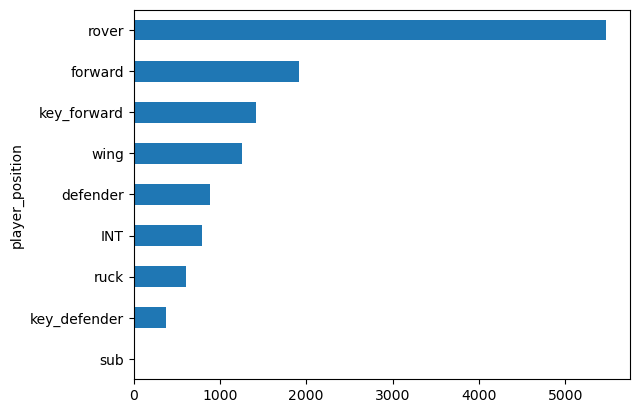

In [12]:
# there is a reason it is called the midfielders medal
polled.groupby('player_position')['brownlow_votes'].sum().sort_values().plot(kind='barh')

<Axes: ylabel='player_position'>

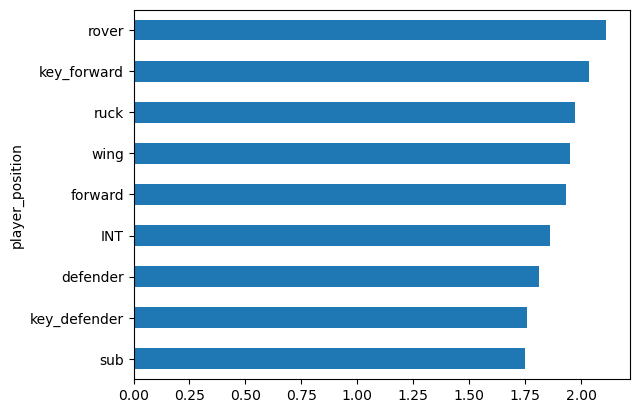

In [13]:
polled.groupby('player_position')['brownlow_votes'].mean().sort_values().plot(kind='barh')

In [15]:
polled.query('player_position == "sub"')[columns]

,player_first_name,player_last_name,player_team,season,match_round,match_winner,goals,disposals,time_on_ground_percentage,brownlow_votes
5111,Brock,McLean,Carlton,2012,15,Carlton,0,28,69,2.0
13503,Ollie,Wines,Port Adelaide,2013,14,Port Adelaide,1,26,55,1.0
25984,Ben,Howlett,Essendon,2015,1,Sydney,0,19,82,3.0
4134,Oliver,Henry,Collingwood,2022,10,Collingwood,4,13,62,1.0


In [16]:
with pd.option_context('display.max_columns', 160):
    display(polled.loc[[25984]])

,match_id,match_home_team,match_away_team,match_date,match_round,match_home_team_goals,match_home_team_behinds,match_home_team_score,match_away_team_goals,match_away_team_behinds,match_away_team_score,match_margin,match_winner,player_id,player_first_name,player_last_name,player_team,kicks,marks,handballs,disposals,effective_disposals,disposal_efficiency_percentage,goals,behinds,hitouts,tackles,rebounds,inside_fifties,clearances,clangers,free_kicks_for,free_kicks_against,brownlow_votes,contested_possessions,uncontested_possessions,contested_marks,marks_inside_fifty,one_percenters,bounces,goal_assists,time_on_ground_percentage,afl_fantasy_score,centre_clearances,stoppage_clearances,score_involvements,metres_gained,turnovers,intercepts,tackles_inside_fifty,contest_def_losses,contest_def_one_on_ones,contest_off_one_on_ones,contest_off_wins,def_half_pressure_acts,effective_kicks,f50_ground_ball_gets,ground_ball_gets,hitouts_to_advantage,hitout_win_percentage,intercept_marks,marks_on_lead,pressure_acts,rating_points,ruck_contests,score_launches,shots_at_goal,spoils,player_position,season
25984,14583,Sydney,Essendon,2015-04-04,1,10,12,72,9,6,60,12,Sydney,11805,Ben,Howlett,Essendon,10,1,9,19,12.0,63,0,0,0,12,1,3,7,2,3,1,3.0,11,6,0,0,1,1,1,82,99.0,1,6,1.0,245.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,12.0,3.0,1.0,7.0,0.0,0.0,0.0,0.0,26.0,16.7,0.0,0.0,0.0,0.0,sub,2015


In [17]:
polled.query('time_on_ground_percentage < 65')[columns]

,player_first_name,player_last_name,player_team,season,match_round,match_winner,goals,disposals,time_on_ground_percentage,brownlow_votes
174,James,Magner,Melbourne,2012,1,Brisbane Lions,2,23,62,2.0
5903,Steve,Johnson,Geelong,2012,17,Geelong,2,22,58,1.0
13503,Ollie,Wines,Port Adelaide,2013,14,Port Adelaide,1,26,55,1.0
26019,Steele,Sidebottom,Collingwood,2015,1,Collingwood,2,19,55,2.0
27403,Jake,Stringer,Western Bulldogs,2015,4,Western Bulldogs,6,15,58,2.0
34539,Clayton,Oliver,Melbourne,2016,1,Melbourne,0,22,58,2.0
38846,Connor,Blakely,Fremantle,2016,12,Fremantle,0,29,61,3.0
51996,Touk,Miller,Gold Coast,2018,1,Gold Coast,0,21,62,2.0
65385,Lance,Franklin,Sydney,2019,14,Sydney,4,5,60,1.0
65660,Cameron,Guthrie,Geelong,2019,15,Geelong,2,22,63,1.0


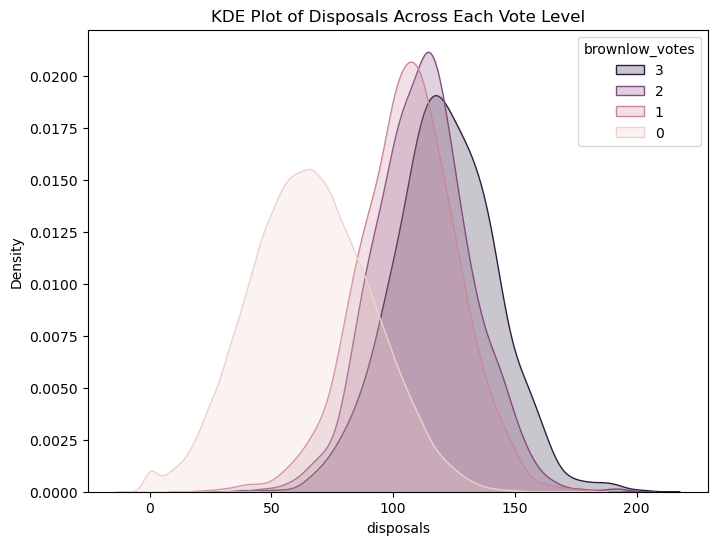

In [38]:
plt.figure(figsize=(8, 6))

sns.kdeplot(data=df, x='afl_fantasy_score', hue='brownlow_votes', fill=True, common_norm=False)
plt.title('KDE Plot of Disposals Across Each Vote Level')
plt.xlabel('disposals')
plt.ylabel('Density')
plt.legend([3,2,1,0], title='brownlow_votes')
plt.show()

In [19]:
# players poll 80% of the time when they achieve 5 or more goals in a match
# according to the 624 occurences from 2012-2022
df.query('goals >= 5')[columns].sort_values('brownlow_votes')

,player_first_name,player_last_name,player_team,season,match_round,match_winner,goals,disposals,time_on_ground_percentage,brownlow_votes
9099,Max,King,St Kilda,2022,23,Sydney,5,12,94,0.0
53155,Josh J.,Kennedy,West Coast,2018,4,West Coast,5,13,75,0.0
52975,Jaidyn,Stephenson,Collingwood,2018,4,Collingwood,5,13,77,0.0
12487,Aaron,Black,North Melbourne,2013,10,North Melbourne,5,17,92,0.0
12602,James,Podsiadly,Geelong,2013,11,Geelong,5,13,94,0.0
...,...,...,...,...,...,...,...,...,...,...
59360,Jack,Riewoldt,Richmond,2018,21,Richmond,10,26,98,3.0
21214,Jarryd,Roughead,Hawthorn,2014,12,Hawthorn,8,24,95,3.0
59797,Lance,Franklin,Sydney,2018,22,Sydney,5,16,92,3.0
60252,Josh,Jenkins,Adelaide,2018,23,Adelaide,7,19,90,3.0


In [20]:
over_30_2 = df.query('disposals >= 30 & goals >= 2')[columns].sort_values('brownlow_votes')

In [21]:
# players poll 86% of the time when achieving 30+ disposals and 2+ goals
len(over_30_2.loc[over_30_2.brownlow_votes != 0]) / len(over_30_2)

0.8556701030927835

In [22]:
clear_10 = df.query('clearances >= 15')[columns].sort_values('brownlow_votes')

In [23]:
len(clear_10.loc[clear_10.brownlow_votes != 0]) / len(clear_10)

0.5294117647058824

In [24]:
def calc_percentage(query):
    
    return_df = df.query(query)[columns].sort_values('brownlow_votes')
    
    return len(return_df.loc[return_df.brownlow_votes != 0]) / len(return_df)

In [25]:
calc_percentage('time_on_ground_percentage < 50')

0.0

In [27]:
polled = df.query('brownlow_votes != 0')

In [28]:
polled.query('match_winner == player_team')

,match_id,match_home_team,match_away_team,match_date,match_round,match_home_team_goals,match_home_team_behinds,match_home_team_score,match_away_team_goals,match_away_team_behinds,...,intercept_marks,marks_on_lead,pressure_acts,rating_points,ruck_contests,score_launches,shots_at_goal,spoils,player_position,season
11,13960,Greater Western Sydney,Sydney,2012-03-24,1,5,7,37,14,16,...,0.0,0.0,23.0,19.5,0.0,2.0,2.0,1.0,C,2012
16,13960,Greater Western Sydney,Sydney,2012-03-24,1,5,7,37,14,16,...,2.0,0.0,18.0,9.8,79.0,2.0,1.0,0.0,RK,2012
17,13960,Greater Western Sydney,Sydney,2012-03-24,1,5,7,37,14,16,...,0.0,0.0,16.0,21.0,0.0,1.0,2.0,2.0,R,2012
58,13961,Richmond,Carlton,2012-03-29,1,12,9,81,18,17,...,0.0,0.0,12.0,19.9,0.0,4.0,2.0,0.0,RR,2012
68,13961,Richmond,Carlton,2012-03-29,1,12,9,81,18,17,...,1.0,0.0,24.0,20.0,44.0,2.0,1.0,5.0,RK,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8944,16343,Port Adelaide,Adelaide,2022-08-20,23,16,15,111,7,13,...,1.0,4.0,6.0,13.5,3.0,1.0,7.0,1.0,FF,2022
8952,16343,Port Adelaide,Adelaide,2022-08-20,23,16,15,111,7,13,...,0.0,0.0,19.0,18.9,0.0,1.0,2.0,0.0,FPR,2022
8974,16344,Hawthorn,Western Bulldogs,2022-08-21,23,10,4,64,12,15,...,1.0,0.0,21.0,16.3,0.0,2.0,2.0,0.0,INT,2022
8988,16344,Hawthorn,Western Bulldogs,2022-08-21,23,10,4,64,12,15,...,0.0,0.0,24.0,15.2,0.0,2.0,2.0,0.0,HFFR,2022


In [29]:
df

,match_id,match_home_team,match_away_team,match_date,match_round,match_home_team_goals,match_home_team_behinds,match_home_team_score,match_away_team_goals,match_away_team_behinds,...,intercept_marks,marks_on_lead,pressure_acts,rating_points,ruck_contests,score_launches,shots_at_goal,spoils,player_position,season
0,13960,Greater Western Sydney,Sydney,2012-03-24,1,5,7,37,14,16,...,0.0,1.0,15.0,11.6,0.0,2.0,1.0,1.0,R,2012
1,13960,Greater Western Sydney,Sydney,2012-03-24,1,5,7,37,14,16,...,0.0,2.0,12.0,9.8,0.0,1.0,2.0,1.0,CHF,2012
2,13960,Greater Western Sydney,Sydney,2012-03-24,1,5,7,37,14,16,...,3.0,0.0,15.0,12.4,0.0,1.0,0.0,3.0,WR,2012
3,13960,Greater Western Sydney,Sydney,2012-03-24,1,5,7,37,14,16,...,1.0,0.0,23.0,15.9,0.0,2.0,1.0,0.0,RR,2012
4,13960,Greater Western Sydney,Sydney,2012-03-24,1,5,7,37,14,16,...,8.0,0.0,7.0,16.0,0.0,2.0,0.0,3.0,CHB,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9103,16346,St Kilda,Sydney,2022-08-21,23,11,8,74,13,10,...,0.0,1.0,8.0,5.6,0.0,1.0,3.0,0.0,INT,2022
9104,16346,St Kilda,Sydney,2022-08-21,23,11,8,74,13,10,...,1.0,0.0,21.0,6.1,0.0,1.0,1.0,0.0,INT,2022
9105,16346,St Kilda,Sydney,2022-08-21,23,11,8,74,13,10,...,0.0,0.0,23.0,5.8,0.0,0.0,2.0,1.0,FPR,2022
9106,16346,St Kilda,Sydney,2022-08-21,23,11,8,74,13,10,...,0.0,3.0,13.0,2.3,0.0,2.0,2.0,0.0,WR,2022


In [30]:
df['30_2'] = ((df['disposals'] >= 30) & (df['goals'] >= 2)).astype(int)

In [31]:
df

,match_id,match_home_team,match_away_team,match_date,match_round,match_home_team_goals,match_home_team_behinds,match_home_team_score,match_away_team_goals,match_away_team_behinds,...,marks_on_lead,pressure_acts,rating_points,ruck_contests,score_launches,shots_at_goal,spoils,player_position,season,30_2
0,13960,Greater Western Sydney,Sydney,2012-03-24,1,5,7,37,14,16,...,1.0,15.0,11.6,0.0,2.0,1.0,1.0,R,2012,0
1,13960,Greater Western Sydney,Sydney,2012-03-24,1,5,7,37,14,16,...,2.0,12.0,9.8,0.0,1.0,2.0,1.0,CHF,2012,0
2,13960,Greater Western Sydney,Sydney,2012-03-24,1,5,7,37,14,16,...,0.0,15.0,12.4,0.0,1.0,0.0,3.0,WR,2012,0
3,13960,Greater Western Sydney,Sydney,2012-03-24,1,5,7,37,14,16,...,0.0,23.0,15.9,0.0,2.0,1.0,0.0,RR,2012,0
4,13960,Greater Western Sydney,Sydney,2012-03-24,1,5,7,37,14,16,...,0.0,7.0,16.0,0.0,2.0,0.0,3.0,CHB,2012,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9103,16346,St Kilda,Sydney,2022-08-21,23,11,8,74,13,10,...,1.0,8.0,5.6,0.0,1.0,3.0,0.0,INT,2022,0
9104,16346,St Kilda,Sydney,2022-08-21,23,11,8,74,13,10,...,0.0,21.0,6.1,0.0,1.0,1.0,0.0,INT,2022,0
9105,16346,St Kilda,Sydney,2022-08-21,23,11,8,74,13,10,...,0.0,23.0,5.8,0.0,0.0,2.0,1.0,FPR,2022,0
9106,16346,St Kilda,Sydney,2022-08-21,23,11,8,74,13,10,...,3.0,13.0,2.3,0.0,2.0,2.0,0.0,WR,2022,0
